## Testing predictions

In [1]:
#lib imports
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#local imports
from utils import *
from image_processing import *

print('TensorFlow version: ', tf.__version__)
print('Keras version: ', keras.__version__)
print('Python version: ', os.sys.version)

TensorFlow version:  2.16.1
Keras version:  3.1.1
Python version:  3.12.2 | packaged by conda-forge | (main, Feb 16 2024, 20:42:31) [MSC v.1937 64 bit (AMD64)]


In [2]:
model_name = 'simple_cnn.h5'
model_dir = './models'

model = load_model(model_name, model_dir)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    11,944,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,963,589 (45.64 MB)

 Trainable params: 11,963,587 (45.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

(1, 224, 224, 3)
[[[[0.08235294 1.         0.03137255]
   [0.08235294 1.         0.03137255]
   [0.08235294 1.         0.03137255]
   ...
   [0.08235294 1.         0.03137255]
   [0.08235294 1.         0.03137255]
   [0.08235294 1.         0.03137255]]

  [[0.08235294 1.         0.03137255]
   [0.08235294 1.         0.03137255]
   [0.08235294 1.         0.03137255]
   ...
   [0.08235294 1.         0.03137255]
   [0.08235294 1.         0.03137255]
   [0.08235294 1.         0.03137255]]

  [[0.08235294 1.         0.03137255]
   [0.08235294 1.         0.03137255]
   [0.08235294 1.         0.03137255]
   ...
   [0.08235294 1.         0.03137255]
   [0.08235294 1.         0.03137255]
   [0.08235294 1.         0.03137255]]

  ...

  [[0.08235294 1.         0.03137255]
   [0.08235294 1.         0.03137255]
   [0.08235294 1.         0.03137255]
   ...
   [0.08235294 1.         0.03137255]
   [0.08235294 1.         0.03137255]
   [0.08235294 1.         0.03137255]]

  [[0.08235294 1.         0.

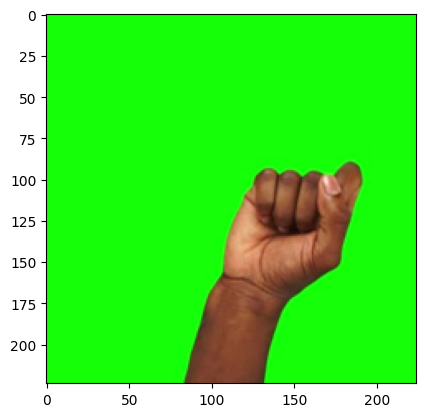

In [3]:
predict_dir = 'predict_images'

if not os.path.exists(predict_dir):
    os.makedirs(predict_dir)

predict_image = 'rr.png'
predict_image_path = os.path.join(predict_dir, predict_image)

prepared_image = prepare_image(predict_image_path)
print(prepared_image.shape)
print(prepared_image)
plt.imshow(prepared_image[0])

predictions = model.predict(prepared_image)
print(predictions)